Nhập thư viện 

In [36]:
import numpy as np #for numeric operations on data
import pandas as pd #for data manipulation operations
import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt  #for data visualization operations
from scipy import stats


Nhập dữ liệu

In [37]:
df = pd.read_csv(r"winequality-red.csv")
display(df.head(5))
display(df.tail(5))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


Thông tin của dữ liệu

In [38]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


(1599, 12)

Đổi tên

In [39]:
df.rename(columns = {"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
                    "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                    "chlorides": "chlorides", "free sulfur dioxide": "free_sulfur_dioxide",
                    "total sulfur dioxide": "total_sulfur_dioxide"}, inplace = True)

Tìm trùng lặp, giá trị Null và giá trị NaN

In [40]:
has_null = df.isnull().sum().any()
has_nan  = df.isna().sum().any()
n_duplicated = df.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df[df.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df[df.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')
if n_duplicated > 0:
    display(df[df.duplicated()])


Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False
+ Số dòng trùng: 240


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


Thống kê mô tả

In [67]:
desc = df.describe()
display(desc.T)
desc_color = desc.T.style.background_gradient(cmap = "Purples_r")
print("\nCác chỉ số cơ bản của describe: \n")
display(desc_color)
md = df.mode().iloc[0]
med = df.median()
quan  = df.quantile(0.6)
iqr = df.apply(lambda col: stats.iqr(col))
range_vals = df.max() - df.min()
extra_stats = pd.DataFrame({"median":med , 
                            "mode": md,
                            "60th percentile":quan, 
                            "IQR":iqr ,
                            "range": range_vals})
combine = pd.concat([desc, extra_stats.T])
print("\nChỉ số của describe sau khi thêm vào các cột như median, mode, IQR,..:\n")
display(combine)


,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000



Các chỉ số cơ bản của describe: 



,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.000000,8.319637,1.741096,4.600000,7.100000,7.900000,9.200000,15.900000
volatile_acidity,1599.000000,0.527821,0.179060,0.120000,0.390000,0.520000,0.640000,1.580000
citric_acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual_sugar,1599.000000,2.538806,1.409928,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1599.000000,0.087467,0.047065,0.012000,0.070000,0.079000,0.090000,0.611000
free_sulfur_dioxide,1599.000000,15.874922,10.460157,1.000000,7.000000,14.000000,21.000000,72.000000
total_sulfur_dioxide,1599.000000,46.467792,32.895324,6.000000,22.000000,38.000000,62.000000,289.000000
density,1599.000000,0.996747,0.001887,0.990070,0.995600,0.996750,0.997835,1.003690
pH,1599.000000,3.311113,0.154386,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1599.000000,0.658149,0.169507,0.330000,0.550000,0.620000,0.730000,2.000000



Chỉ số của describe sau khi thêm vào các cột như median, mode, IQR,..:



,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000
median,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
mode,7.200000,0.600000,0.000000,2.000000,0.080000,6.000000,28.000000,0.997200,3.300000,0.600000,9.500000,5.000000


**Xử lí dữ liệu**

In [43]:
dropdup_df = df.drop_duplicates()
display(dropdup_df)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Do dữ liệu thường là số, không có dữ liệu thiếu hoặc bị lỗi, mà chỉ có các dữ liệu trùng lặp có thể gây ảnh hưởng đến việc thống kê, từ đó chỉ cần tạo 1 biến chứa dữ liệu đã loại bỏ các giá trị trùng lặp, để so sánh với dữ liệu gốc.

**Trực quan hóa dữ liệu**

Sự tương quan của dữ liệu

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile_acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric_acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual_sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free_sulfur_dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total_sulfur_dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


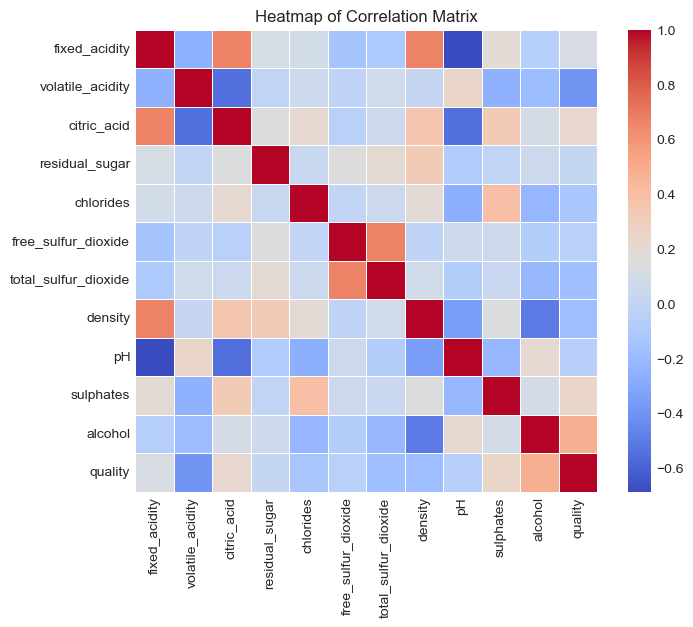

In [44]:
correlations = dropdup_df.corr(method='pearson')
display(correlations)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, cmap='coolwarm', cbar=True, square=True, linewidths=.5)
plt.title('Heatmap of Correlation Matrix')

# Xuất ra file PNG với chất lượng cao (300 DPI)
# bbox_inches='tight' giúp cắt bỏ khoảng trắng thừa xung quanh biểu đồ  
plt.savefig(r'savepic\corre\Corre.png', dpi=300, bbox_inches='tight')

# Xuất ra file PDF (dạng vector, không bị vỡ khi zoom)
plt.savefig(r'savepic\corre\Corre.pdf', bbox_inches='tight')

# Xuất ra file SVG (dạng vector, dùng cho web)
plt.savefig(r'savepic\corre\Corre.svg', bbox_inches='tight')

plt.show()


**TÌM GIÁ TRỊ NGOẠI LAI**

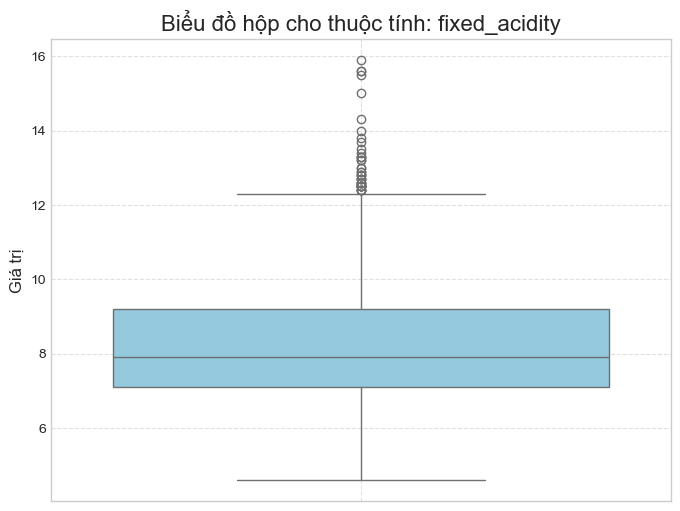

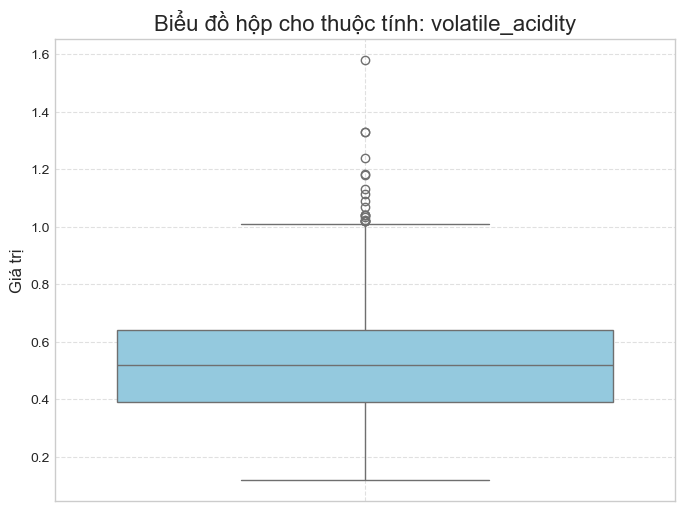

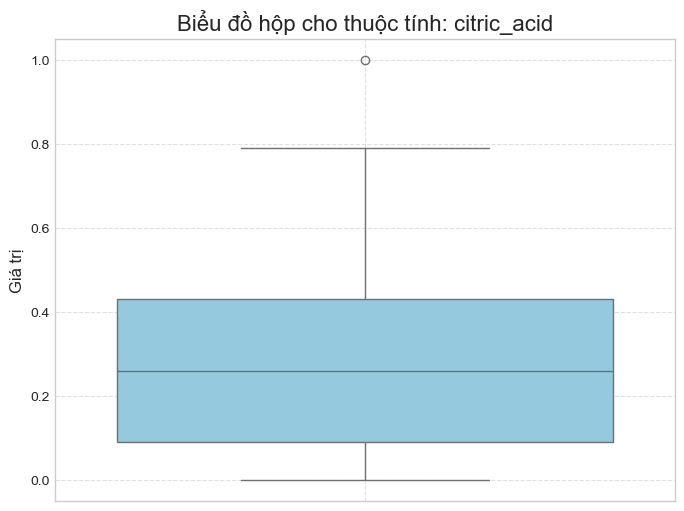

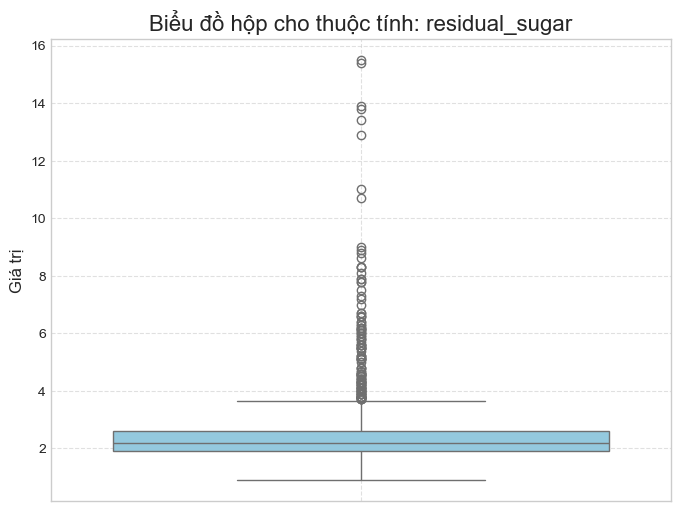

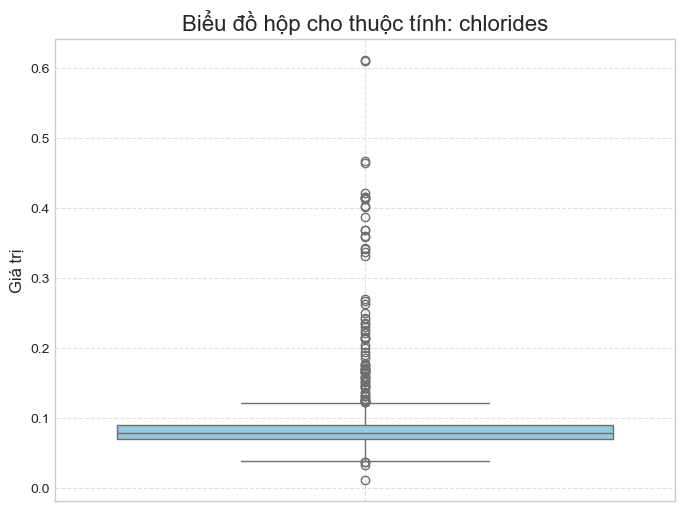

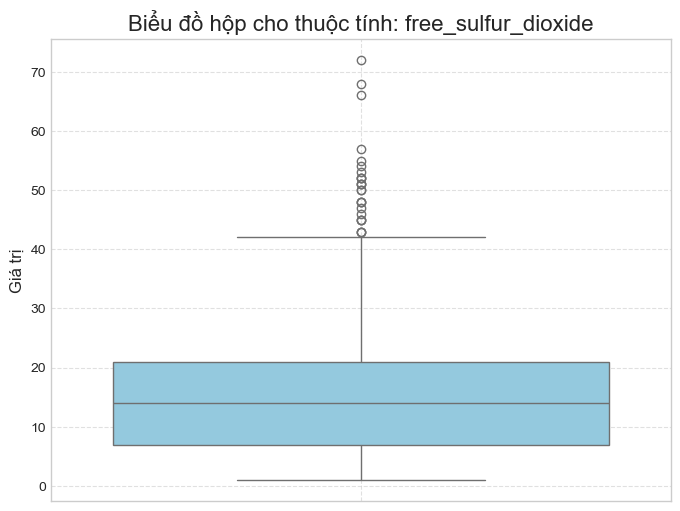

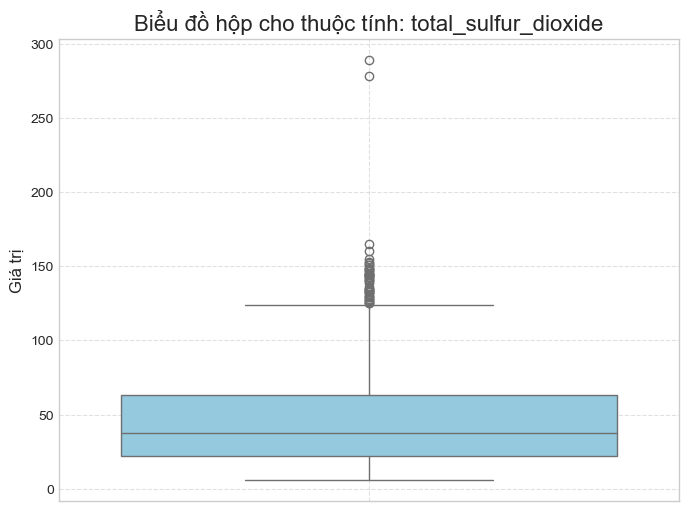

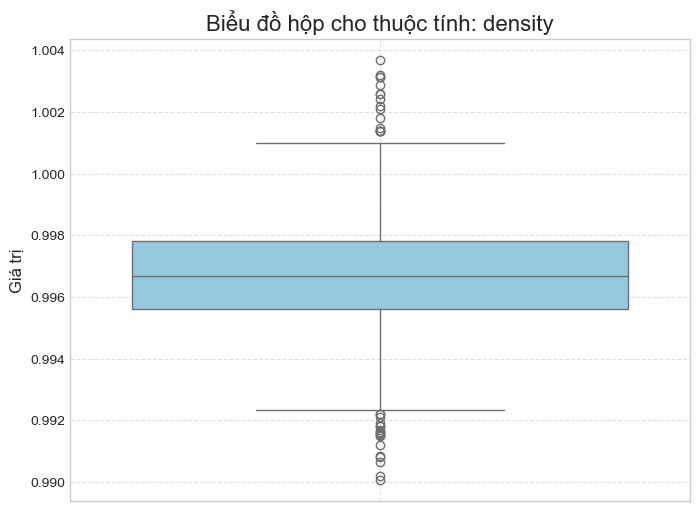

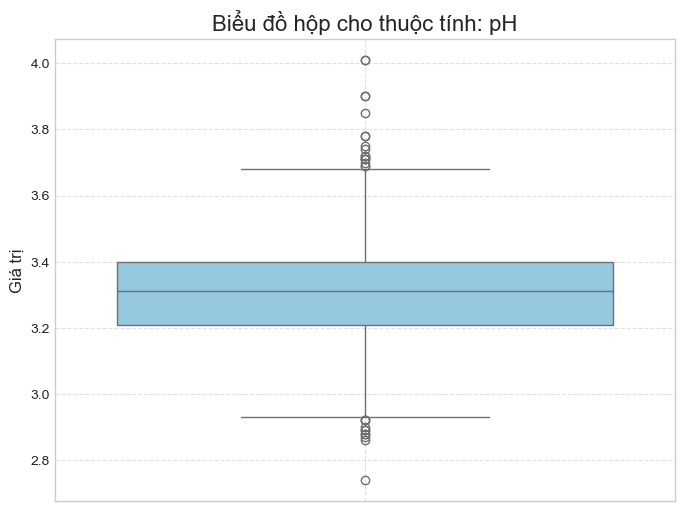

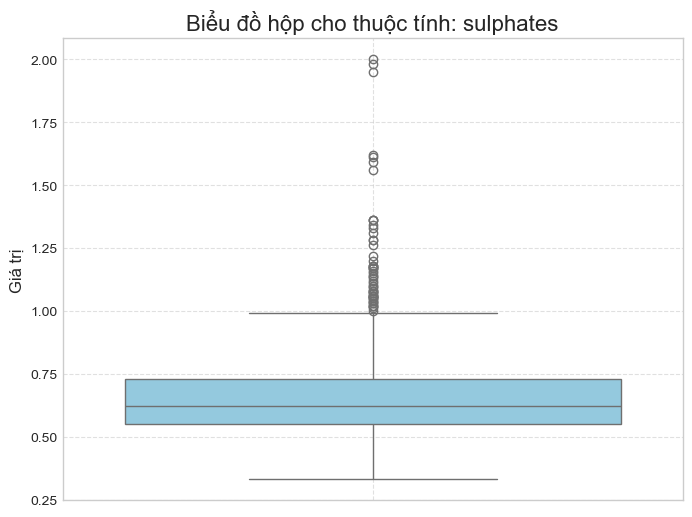

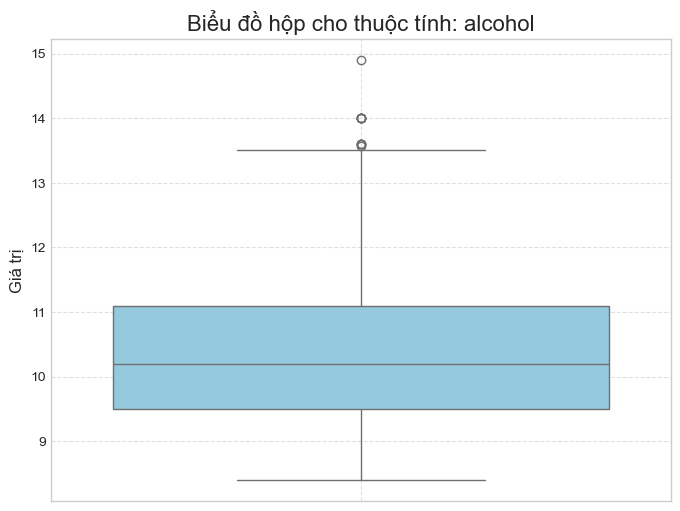

In [45]:
# Đổi tên cột để dễ truy cập
df.rename(columns = {"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
                    "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                    "chlorides": "chlorides", "free sulfur dioxide": "free_sulfur_dioxide",
                    "total sulfur dioxide": "total_sulfur_dioxide"}, inplace = True)

# Loại bỏ các dòng dữ liệu trùng lặp để phân tích chính xác hơn
dropdup_df = df.drop_duplicates()

# --- Bước 2: Trực quan hóa bằng Biểu đồ hộp ---
# Chọn các cột dữ liệu dạng số mà bạn muốn kiểm tra (loại bỏ cột 'quality' để tập trung vào các thuộc tính)
numeric_cols = dropdup_df.select_dtypes(include=np.number).drop(columns=['quality'])

for column in numeric_cols.columns:
    plt.figure(figsize=(8, 6)) # Tạo một figure mới cho mỗi biểu đồ
    
    # Vẽ biểu đồ hộp cho cột hiện tại
    sns.boxplot(data=dropdup_df, y=column, color='skyblue')
    
    # Thêm tiêu đề và nhãn
    plt.title(f'Biểu đồ hộp cho thuộc tính: {column}', fontsize=16)
    plt.ylabel('Giá trị', fontsize=12)
    
    # Lưu biểu đồ (tùy chọn, bạn có thể bỏ qua nếu không cần)
    # plt.savefig(f'savepic/boxplot_{column}.png', dpi=300, bbox_inches='tight')
    
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Hiển thị biểu đồ
    plt.show()


**HISTOGRAM**

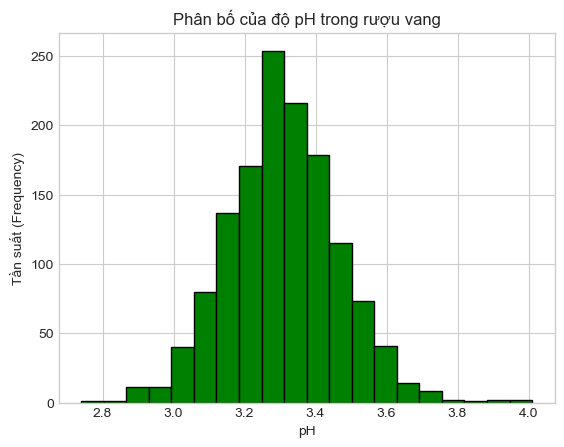

In [46]:
# 1. Chọn cột dữ liệu bạn muốn vẽ
# Bạn chỉ cần chọn cột có kiểu dữ liệu là số
ph_data = dropdup_df['pH']

# 2. Tạo Figure và Axes
fig, ax = plt.subplots()

# 3. Vẽ histogram
# bins=20 nghĩa là chia dải giá trị pH thành 20 khoảng
ax.hist(ph_data, bins=20, color='green', edgecolor='black')

# 4. Tùy chỉnh
ax.set_title('Phân bố của độ pH trong rượu vang')
ax.set_xlabel('pH')
ax.set_ylabel('Tần suất (Frequency)')

# Xuất ra file PNG với chất lượng cao (300 DPI)
# bbox_inches='tight' giúp cắt bỏ khoảng trắng thừa xung quanh biểu đồ  
plt.savefig(r'savepic\histo\His_ph.png', dpi=300, bbox_inches='tight')

# Xuất ra file PDF (dạng vector, không bị vỡ khi zoom)
plt.savefig(r'savepic\histo\His_ph.pdf', bbox_inches='tight')

# Xuất ra file SVG (dạng vector, dùng cho web)
plt.savefig(r'savepic\histo\His_ph.svg', bbox_inches='tight')

# 5. Hiển thị
plt.show()

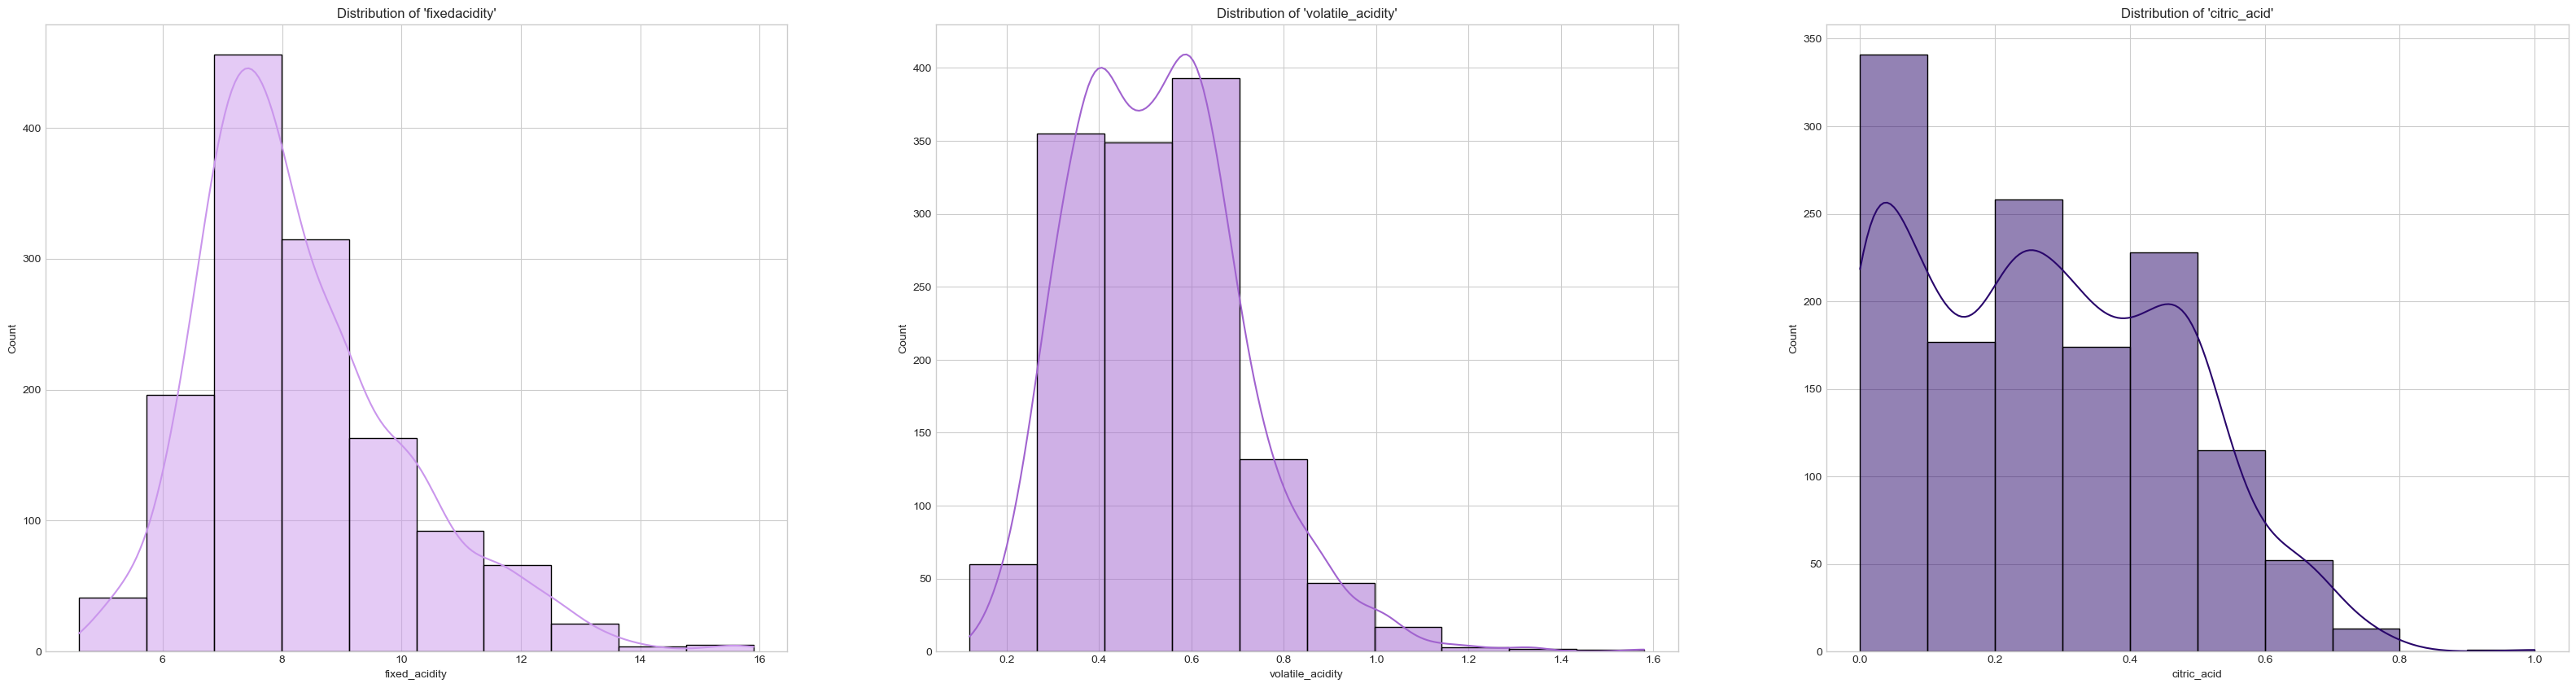

In [47]:
fig, axes = plt.subplots(1, 3, figsize = (40, 10))

sns.histplot(ax = axes[0], x = dropdup_df["fixed_acidity"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#CA96EC").set(title = "Distribution of 'fixedacidity'");
sns.histplot(ax = axes[1], x = dropdup_df["volatile_acidity"],
             bins = 10,
             cbar = True,
             kde = True,
             color = "#A163CF").set(title = "Distribution of 'volatile_acidity'");

sns.histplot(ax = axes[2], x = dropdup_df["citric_acid"],
             bins = 10,
             kde = True,   
             cbar = True,
             color = "#29066B").set(title = "Distribution of 'citric_acid'");



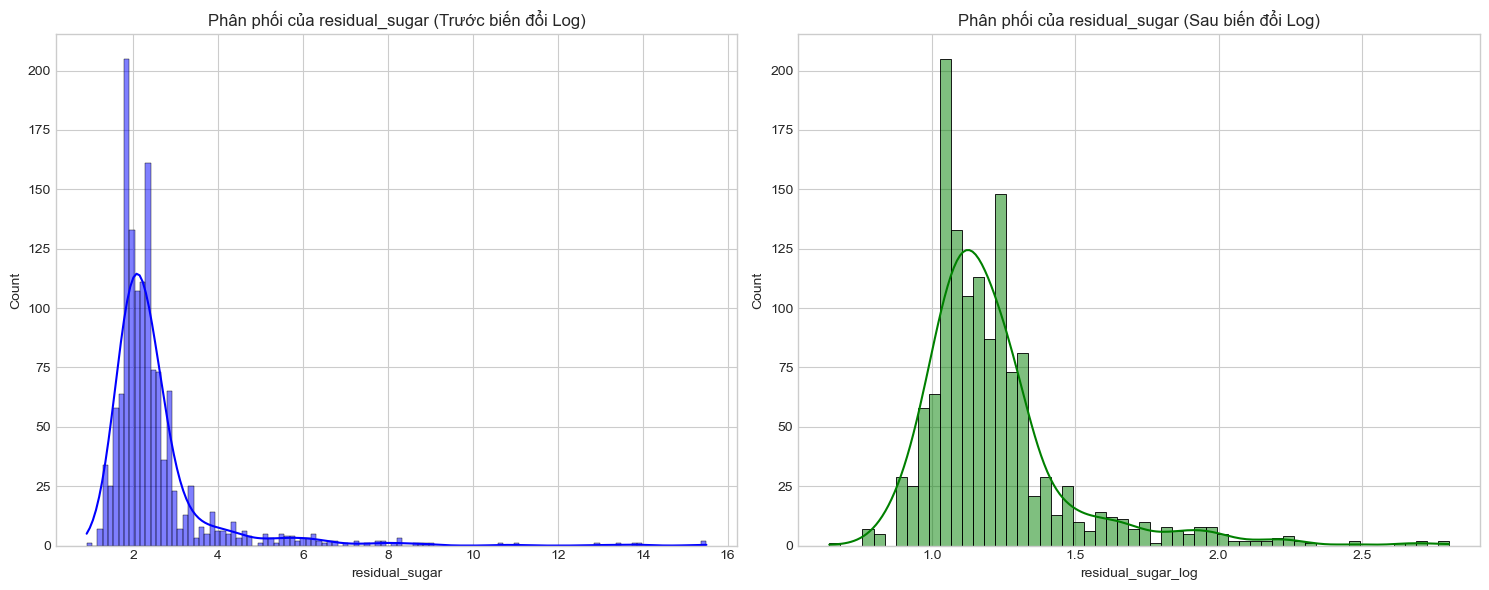

In [48]:
# Loại bỏ các dòng trùng lặp
dropdup_df = df.drop_duplicates().copy() # Thêm .copy() để tránh cảnh báo

# Áp dụng biến đổi Log 
# Tạo một cột mới với phép biến đổi log
# Sử dụng np.log1p để xử lý các giá trị bằng 0 một cách an toàn (log(x+1))
dropdup_df['residual_sugar_log'] = np.log1p(dropdup_df['residual_sugar'])

# Trực quan hóa để so sánh 
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Biểu đồ trước khi biến đổi
sns.histplot(dropdup_df['residual_sugar'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Phân phối của residual_sugar (Trước biến đổi Log)')

# Biểu đồ sau khi biến đổi
sns.histplot(dropdup_df['residual_sugar_log'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Phân phối của residual_sugar (Sau biến đổi Log)')

plt.tight_layout()
plt.show()

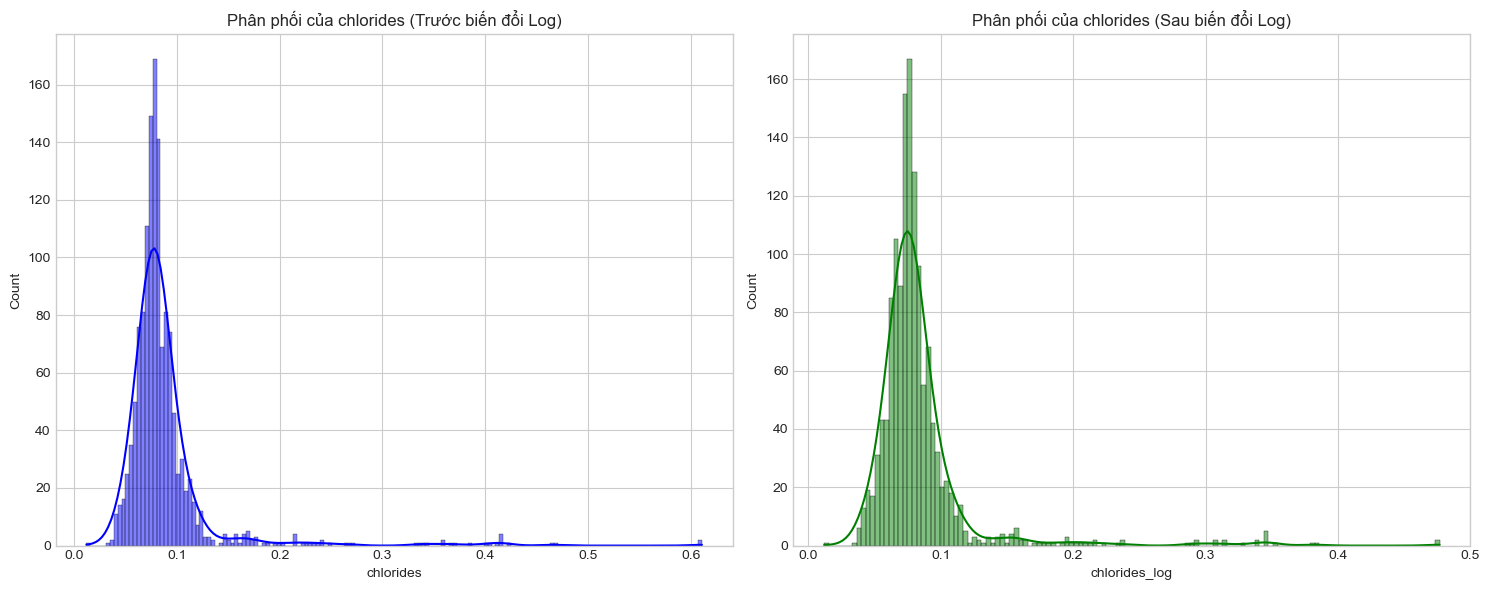

In [49]:
# Áp dụng biến đổi Log 
# Tạo một cột mới với phép biến đổi log
# Sử dụng np.log1p để xử lý các giá trị bằng 0 một cách an toàn (log(x+1))
dropdup_df['chlorides_log'] = np.log1p(dropdup_df['chlorides'])

# Trực quan hóa để so sánh 
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Biểu đồ trước khi biến đổi
sns.histplot(dropdup_df['chlorides'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Phân phối của chlorides (Trước biến đổi Log)')

# Biểu đồ sau khi biến đổi
sns.histplot(dropdup_df['chlorides_log'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Phân phối của chlorides (Sau biến đổi Log)')

plt.tight_layout()
plt.show()

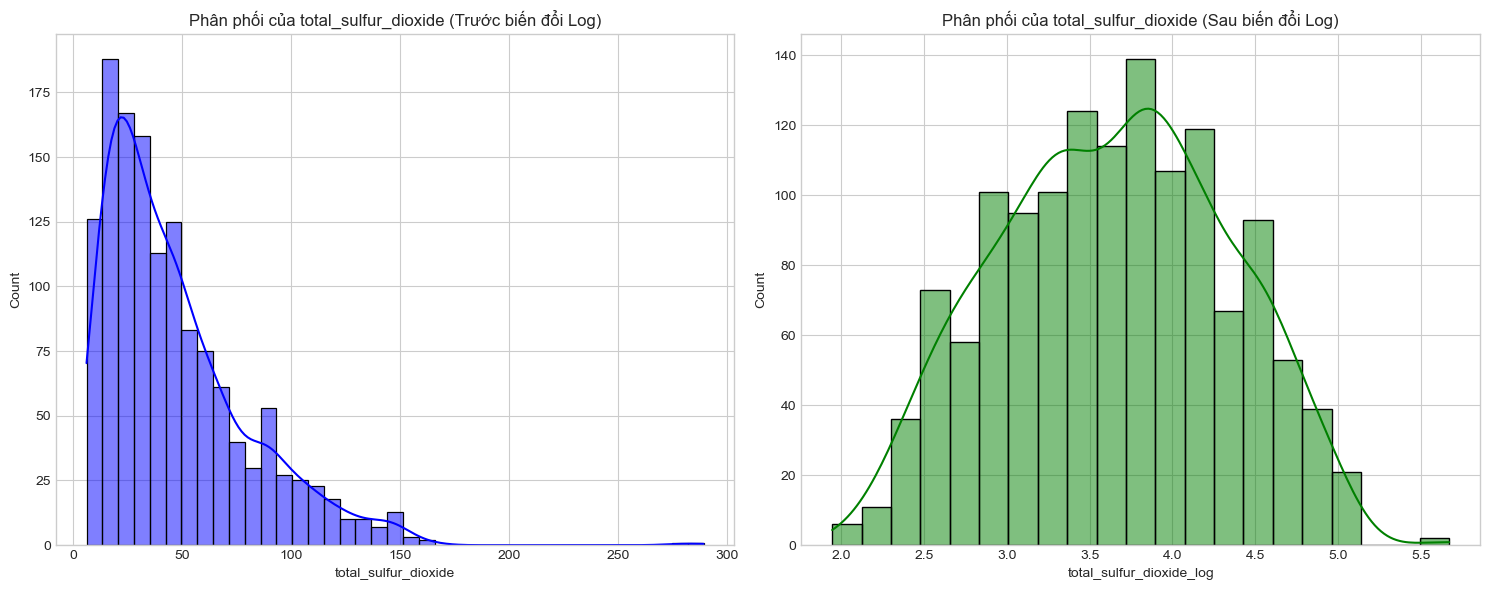

In [50]:
# Áp dụng biến đổi Log 
# Tạo một cột mới với phép biến đổi log
# Sử dụng np.log1p để xử lý các giá trị bằng 0 một cách an toàn (log(x+1))
dropdup_df['total_sulfur_dioxide_log'] = np.log1p(dropdup_df['total_sulfur_dioxide'])

# Trực quan hóa để so sánh 
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Biểu đồ trước khi biến đổi
sns.histplot(dropdup_df['total_sulfur_dioxide'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Phân phối của total_sulfur_dioxide (Trước biến đổi Log)')

# Biểu đồ sau khi biến đổi
sns.histplot(dropdup_df['total_sulfur_dioxide_log'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Phân phối của total_sulfur_dioxide (Sau biến đổi Log)')

plt.tight_layout()
plt.show()

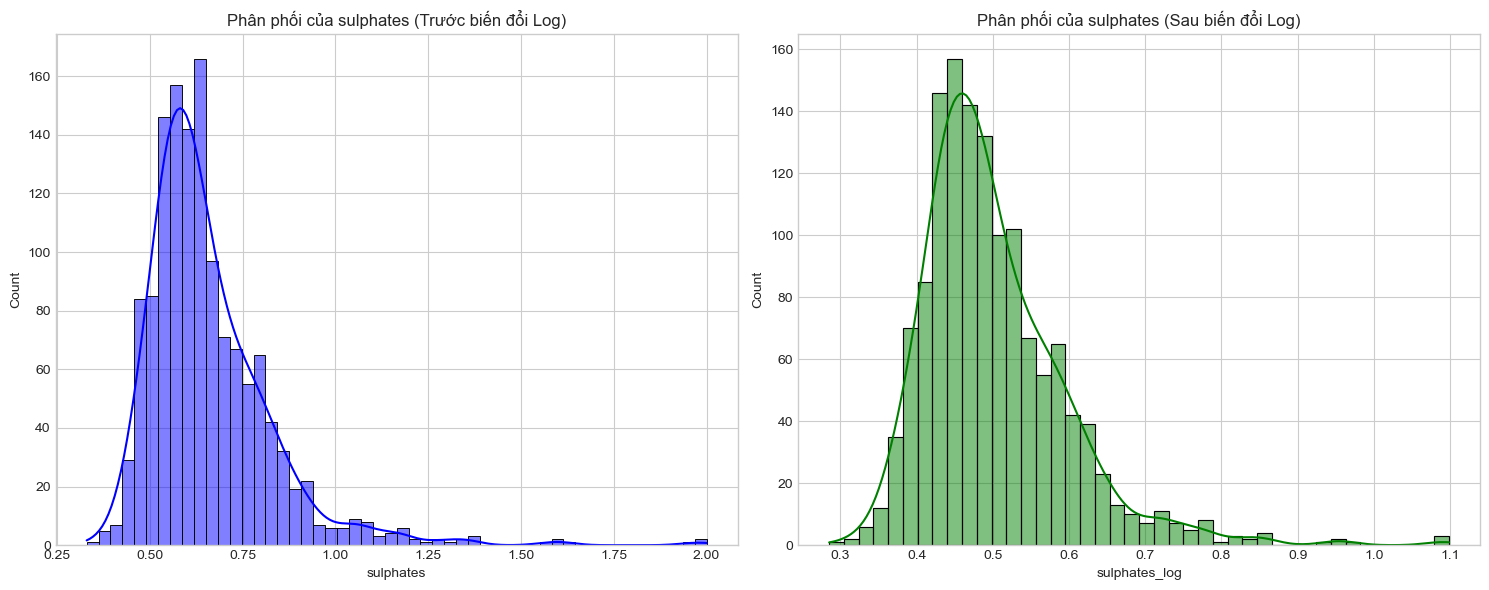

In [51]:
# Áp dụng biến đổi Log 
# Tạo một cột mới với phép biến đổi log
# Sử dụng np.log1p để xử lý các giá trị bằng 0 một cách an toàn (log(x+1))
dropdup_df['sulphates_log'] = np.log1p(dropdup_df['sulphates'])

# Trực quan hóa để so sánh 
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Biểu đồ trước khi biến đổi
sns.histplot(dropdup_df['sulphates'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Phân phối của sulphates (Trước biến đổi Log)')

# Biểu đồ sau khi biến đổi
sns.histplot(dropdup_df['sulphates_log'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Phân phối của sulphates (Sau biến đổi Log)')

plt.tight_layout()
plt.show()

**BAR CHART**

quality
3      99.550000
4     544.050000
5    5705.700000
6    5702.500000
7    1919.016667
8     206.700000
Name: alcohol, dtype: float64


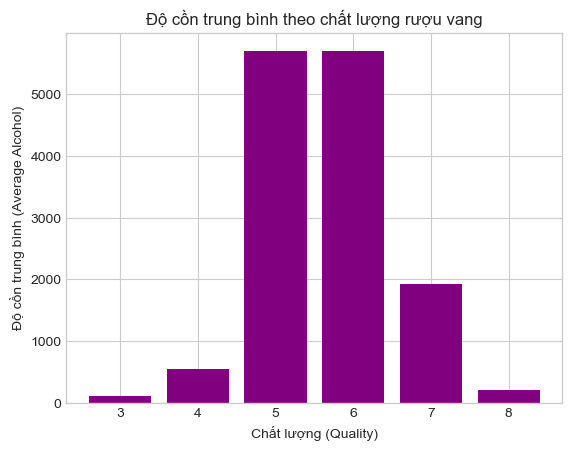

In [52]:
# 1. Xử lý dữ liệu: Nhóm theo 'quality' và tính 'alcohol' trung bình
average_alcohol_by_quality = dropdup_df.groupby('quality')['alcohol'].sum()

# In ra kết quả để xem
print(average_alcohol_by_quality)

# 2. Tạo Figure và Axes
fig, ax = plt.subplots()

# 3. Vẽ biểu đồ cột
# .index dùng để lấy các nhãn (5, 6, 7...), .values để lấy giá trị trung bình
ax.bar(average_alcohol_by_quality.index, average_alcohol_by_quality.values, color='purple')

# 4. Tùy chỉnh biểu đồ
ax.set_title('Độ cồn trung bình theo chất lượng rượu vang')
ax.set_xlabel('Chất lượng (Quality)')
ax.set_ylabel('Độ cồn trung bình (Average Alcohol)')
plt.xticks(average_alcohol_by_quality.index) # Đảm bảo các nhãn trục x hiển thị đúng

plt.savefig(r'savepic\bar\bar_sum.png', dpi=300, bbox_inches='tight')

# Xuất ra file PDF (dạng vector, không bị vỡ khi zoom)
plt.savefig(r'savepic\bar\bar_sum.pdf', bbox_inches='tight')

# Xuất ra file SVG (dạng vector, dùng cho web)
plt.savefig(r'savepic\bar\bar_sum.svg', bbox_inches='tight')

# 5. Hiển thị biểu đồ
plt.show()


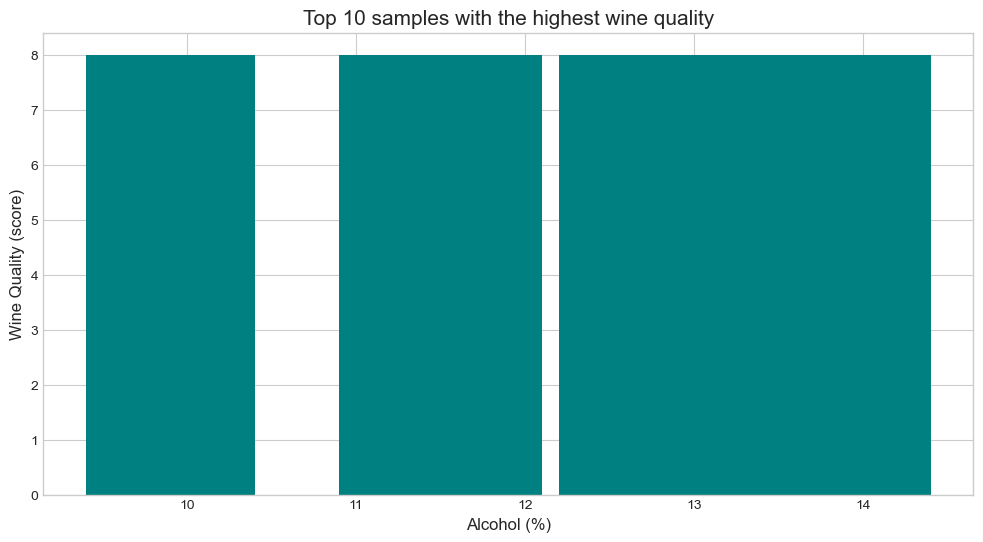

In [53]:
# Sắp xếp theo chất lượng giảm dần
df_qualitysorted = dropdup_df.sort_values('quality', ascending=False)
top10 = df_qualitysorted.head(10)

plt.figure(figsize=(12,6))
x = top10['alcohol']
y = top10['quality']

plt.bar(x, y, color="teal")
plt.title('Top 10 samples with the highest wine quality', fontsize=15)
plt.xlabel('Alcohol (%)', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Wine Quality (score)', fontsize=12)
plt.yticks(fontsize=10)

plt.savefig(r'savepic\bar\bar_top.png', dpi=300, bbox_inches='tight')

# Xuất ra file PDF (dạng vector, không bị vỡ khi zoom)
plt.savefig(r'savepic\bar\bar_top.pdf', bbox_inches='tight')

# Xuất ra file SVG (dạng vector, dùng cho web)
plt.savefig(r'savepic\bar\bar_top.svg', bbox_inches='tight')


plt.show()

C:\Users\kimho\AppData\Local\Temp\ipykernel_6872\3549744334.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




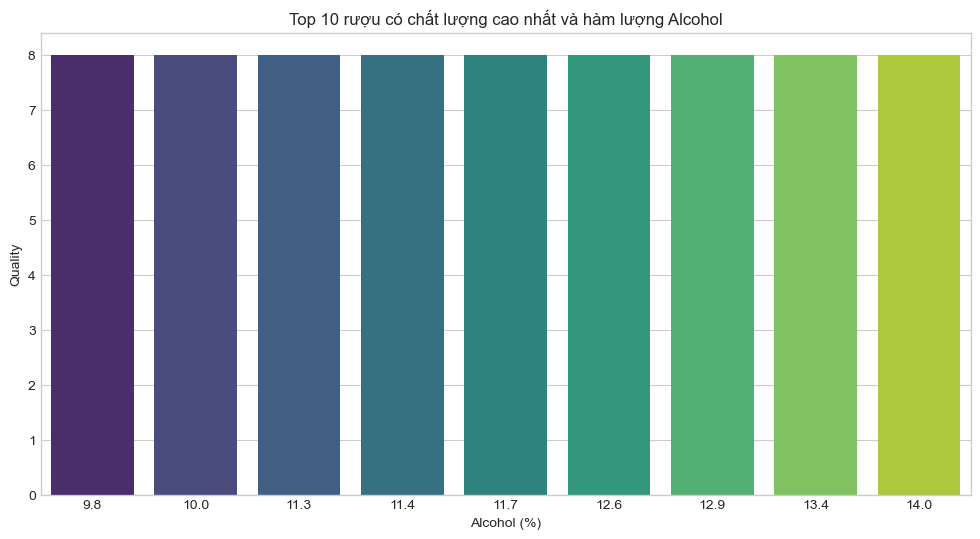

In [54]:
df_qualitysorted = dropdup_df.sort_values('quality', ascending=False)

# Lấy 10 dòng đầu tiên
top10 = df_qualitysorted.head(10)

# Vẽ barplot
plt.figure(figsize=(12,6))
sns.barplot(data=top10, x="alcohol", y="quality", palette="viridis")

plt.title("Top 10 rượu có chất lượng cao nhất và hàm lượng Alcohol")
plt.xlabel("Alcohol (%)")
plt.ylabel("Quality")

plt.savefig(r'savepic\bar\bar_top_lowbin.png', dpi=300, bbox_inches='tight')

# Xuất ra file PDF (dạng vector, không bị vỡ khi zoom)
plt.savefig(r'savepic\bar\bar_top_lowbin.pdf', bbox_inches='tight')

# Xuất ra file SVG (dạng vector, dùng cho web)
plt.savefig(r'savepic\bar\bar_top_lowbin.svg', bbox_inches='tight')

plt.show()

**SCATTER**

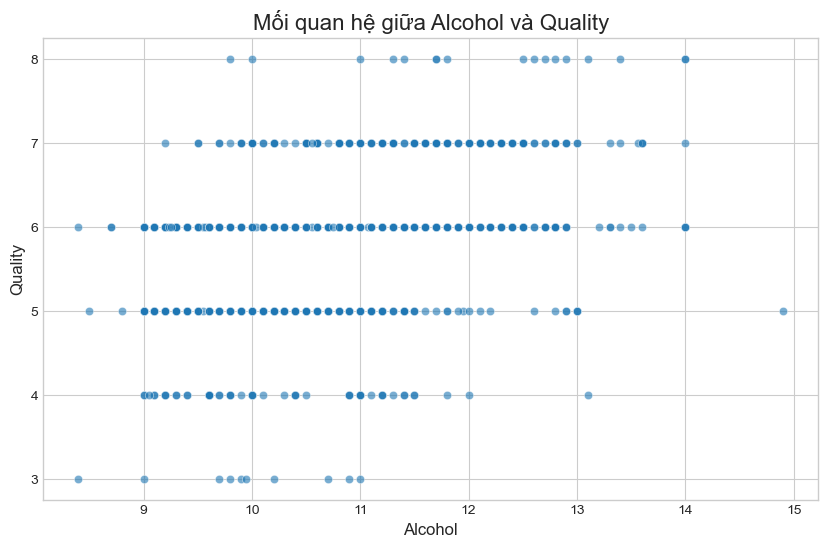

In [55]:
x_column = 'alcohol'
y_column = 'quality'

# --- Bước 1: Vẽ biểu đồ Scatter Plot ---
plt.style.use('seaborn-v0_8-whitegrid') # Sử dụng style cho đẹp hơn
plt.figure(figsize=(10, 6)) # Tùy chỉnh kích thước biểu đồ

sns.scatterplot(data=dropdup_df, x=x_column, y=y_column, alpha=0.6)

# --- Bước 2: Tùy chỉnh biểu đồ ---
plt.title(f'Mối quan hệ giữa {x_column.capitalize()} và {y_column.capitalize()}', fontsize=16)
plt.xlabel(x_column.capitalize(), fontsize=12)
plt.ylabel(y_column.capitalize(), fontsize=12)

plt.savefig(r'savepic\scatter\scat_QuawAlc.png', dpi=300, bbox_inches='tight')

# Xuất ra file PDF (dạng vector, không bị vỡ khi zoom)
plt.savefig(r'savepic\scatter\scat_QuawAlc.pdf', bbox_inches='tight')

# Xuất ra file SVG (dạng vector, dùng cho web)
plt.savefig(r'savepic\scatter\scat_QuawAlc.svg', bbox_inches='tight')


# Hiển thị biểu đồ
plt.show()

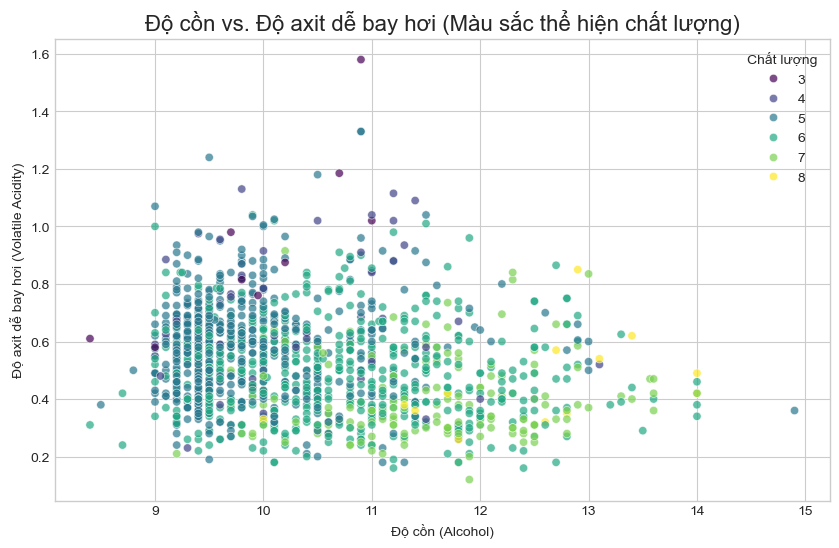

In [56]:
# Tạo biểu đồ
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=dropdup_df,
    x='alcohol',
    y='volatile_acidity',
    hue='quality',  # Biến thứ ba được mã hóa bằng màu sắc
    palette='viridis',
    alpha=0.7
)

# Thêm tiêu đề và nhãn
plt.title('Độ cồn vs. Độ axit dễ bay hơi (Màu sắc thể hiện chất lượng)', fontsize=16)
plt.xlabel('Độ cồn (Alcohol)')
plt.ylabel('Độ axit dễ bay hơi (Volatile Acidity)')
plt.legend(title='Chất lượng')
plt.grid(True)

plt.savefig(r'savepic\scatter\scat_VolwAl.png', dpi=300, bbox_inches='tight')

# Xuất ra file PDF (dạng vector, không bị vỡ khi zoom)
plt.savefig(r'savepic\scatter\scat_VolwAl.pdf', bbox_inches='tight')

# Xuất ra file SVG (dạng vector, dùng cho web)
plt.savefig(r'savepic\scatter\scat_VolwAl.svg', bbox_inches='tight')



# Hiển thị biểu đồ
plt.show()

Rượu vang có chất lượng cao hơn (điểm sáng màu) có xu hướng tập trung ở khu vực có độ cồn (alcohol) cao và độ axit dễ bay hơi (volatile acidity) thấp.

In [57]:
import plotly.express as px
dropdup_df['quality'] = dropdup_df['quality'].astype(str)
# Tạo biểu đồ phân tán tương tác
fig1 = px.scatter(
    df,
    x='alcohol',
    y='volatile_acidity',
    color='quality',  # Biến thứ ba mã hóa bằng màu sắc
    color_discrete_sequence=px.colors.sequential.Viridis, # Chọn bảng màu
    hover_data=['fixed_acidity', 'citric_acid', 'sulphates'], # Thêm dữ liệu khi di chuột
    title='Độ cồn vs. Độ axit dễ bay hơi (Tương tác)'
)

# Hiển thị biểu đồ
fig1.show()

# Để lưu ra file HTML
fig1.write_html(r"savepic\scatter\interactive_scatter.html")

In [61]:
cols_for_pairplot = ['volatile_acidity', 'sulphates', 'alcohol', 'quality']

# Tạo biểu đồ cặp tương tác với BẢNG MÀU ĐÚNG của Plotly
fig2 = px.scatter_matrix(
    dropdup_df,
    dimensions=cols_for_pairplot[:-1],
    color='quality',
    # SỬA LỖI Ở ĐÂY: Dùng bảng màu có sẵn của Plotly
    color_discrete_sequence=px.colors.qualitative.Plotly,  
    title='Biểu đồ cặp tương tác giữa các thuộc tính rượu vang'
)

# Cập nhật layout để biểu đồ gọn hơn
fig2.update_layout(height=700, width=700)

# Hiển thị biểu đồ
fig2.show()

fig2.write_html(r"savepic\scatter\interactive_scatter_multi.html")